<a href="https://colab.research.google.com/github/npgeorge/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Nicholas_George_Copy_of_LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [1]:
!pip install pandas==0.23.4
#make sure to "restart runtime" to ensure this will run, even if it install and says its satisfied. Runtime-->Restart Runtime and it will work
#loading this at the top to ensure it works anytime i want to take a look at the crosstabs

In [2]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')

df.head()

,Unnamed: 0,age,weight,exercise_time
0,0,44,118,192
1,1,41,161,35
2,2,46,128,220
3,3,39,216,57
4,4,28,116,182


In [3]:
df.shape

(1200, 4)

In [4]:
df.dtypes

Unnamed: 0       int64
age              int64
weight           int64
exercise_time    int64
dtype: object

In [5]:
#all integers so lets check some summary statistics
df.describe()

,Unnamed: 0,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,599.500000,48.396667,153.540833,134.910833
std,346.554469,18.166802,35.132182,85.548895
min,0.000000,18.000000,100.000000,0.000000
25%,299.750000,33.000000,125.000000,65.000000
50%,599.500000,48.000000,149.000000,122.000000
75%,899.250000,64.000000,180.250000,206.000000
max,1199.000000,80.000000,246.000000,300.000000


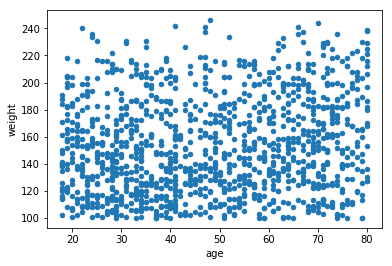

In [6]:
df.plot(x='age', y='weight', kind='scatter') ;

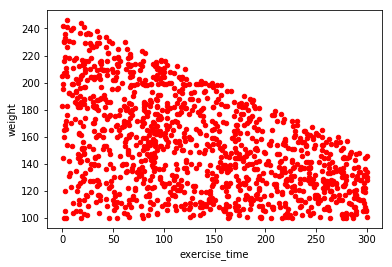

In [7]:
df.plot(x='exercise_time', y='weight', kind='scatter', color='r') ;

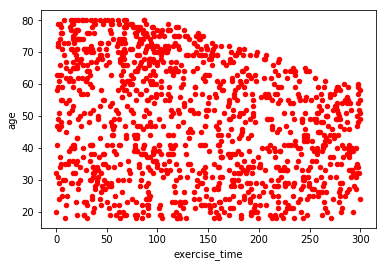

In [8]:
df.plot(x='exercise_time', y='age', kind='scatter', color='r') ;

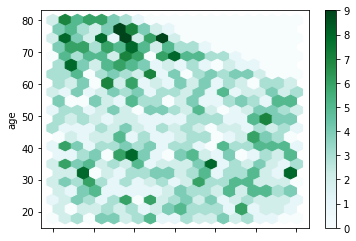

In [60]:
df.plot.hexbin(x='exercise_time', y='age', gridsize=20); #trying out different plots


In [0]:
#both weight and age are related to exercise time, thus making exercise time the confounding variable

In [19]:
#bin the weights, and ages using the crosstab to see if you can pull a more meaningful relationship
#need to bin all three of the parameters
#it makes sense to bin all the variables so you only have a few categories

#pd.crosstab(df['age'], df['exercise_time'])
exercise_time_bins = pd.cut(df['exercise_time'], 5) 
age_bins = pd.cut(df['age'], 5)
weight_bins = pd.cut(df['weight'],5)

#pd.crosstab(df['exercise_time'], exercise_time_bins, normalize='columns')
#pd.crosstab(df['age'], age_bins, normalize='columns')
#pd.crosstab(df['weight'], weight_bins, normalize='columns')

#pd.crosstab(exercise_time_bins, df['age'])
pd.crosstab(exercise_time_bins, age_bins, normalize='columns') #still gives error after downgrading to older version
#print('This is a better way to split the data up. We can see five different age groups and the bins of the percentage of exercise time for each age group.')


age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
exercise_time,,,,,
"(-0.3, 60.0]",0.203125,0.205534,0.183857,0.207207,0.353659
"(60.0, 120.0]",0.179688,0.217391,0.188341,0.319820,0.414634
"(120.0, 180.0]",0.210938,0.166008,0.174888,0.180180,0.195122
"(180.0, 240.0]",0.238281,0.185771,0.152466,0.184685,0.036585
"(240.0, 300.0]",0.167969,0.225296,0.300448,0.108108,0.000000


In [20]:
pd.crosstab(exercise_time_bins, weight_bins, normalize='columns')

weight,"(99.854, 129.2]","(129.2, 158.4]","(158.4, 187.6]","(187.6, 216.8]","(216.8, 246.0]"
exercise_time,,,,,
"(-0.3, 60.0]",0.141333,0.131343,0.236434,0.424581,0.830189
"(60.0, 120.0]",0.173333,0.226866,0.360465,0.407821,0.169811
"(120.0, 180.0]",0.189333,0.200000,0.217054,0.162011,0.000000
"(180.0, 240.0]",0.210667,0.220896,0.147287,0.005587,0.000000
"(240.0, 300.0]",0.285333,0.220896,0.038760,0.000000,0.000000


In [35]:
wa = pd.crosstab(weight_bins, age_bins, normalize='columns')
wa

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
weight,,,,,
"(99.854, 129.2]",0.312500,0.411067,0.349776,0.238739,0.243902
"(129.2, 158.4]",0.335938,0.245059,0.278027,0.319820,0.219512
"(158.4, 187.6]",0.191406,0.193676,0.219731,0.202703,0.268293
"(187.6, 216.8]",0.132812,0.122530,0.116592,0.198198,0.178862
"(216.8, 246.0]",0.027344,0.027668,0.035874,0.040541,0.089431


In [39]:
wa_subset = wa.iloc[:, [0,1,2]] #the ":" is specifying ALL rows, and the list is specifying which columns
wa_subset

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]"
weight,,,
"(99.854, 129.2]",0.312500,0.411067,0.349776
"(129.2, 158.4]",0.335938,0.245059,0.278027
"(158.4, 187.6]",0.191406,0.193676,0.219731
"(187.6, 216.8]",0.132812,0.122530,0.116592
"(216.8, 246.0]",0.027344,0.027668,0.035874


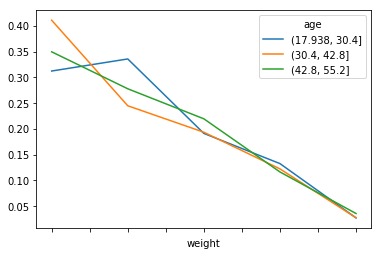

In [38]:
wa_subset.plot();

In [40]:
a_t = pd.crosstab(exercise_time_bins, age_bins, normalize='columns')
a_t

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]","(55.2, 67.6]","(67.6, 80.0]"
exercise_time,,,,,
"(-0.3, 60.0]",0.203125,0.205534,0.183857,0.207207,0.353659
"(60.0, 120.0]",0.179688,0.217391,0.188341,0.319820,0.414634
"(120.0, 180.0]",0.210938,0.166008,0.174888,0.180180,0.195122
"(180.0, 240.0]",0.238281,0.185771,0.152466,0.184685,0.036585
"(240.0, 300.0]",0.167969,0.225296,0.300448,0.108108,0.000000


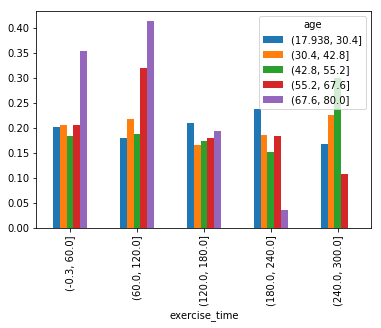

In [56]:
#plotting the age bins to exercise time. This shows some interesting relationships. You can clearly see the higher age bracket drops off considerably
a_t.plot(kind='bar',style='ggplot');

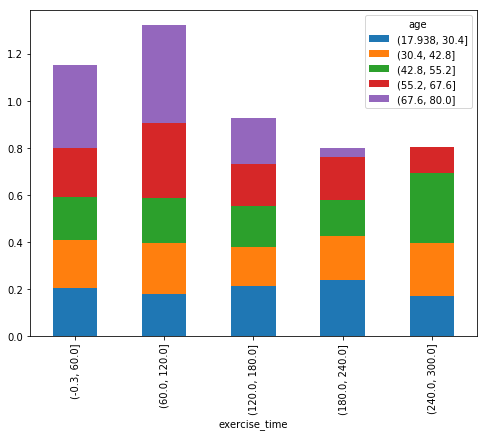

In [69]:
a_t.plot(kind='bar',stacked=True, figsize=(8, 6));

In [52]:
#using the iloc feature to segment the data to visualize it better
a_t_subset = a_t.iloc[:,[0,1,2]]
a_t_subset

age,"(17.938, 30.4]","(30.4, 42.8]","(42.8, 55.2]"
exercise_time,,,
"(-0.3, 60.0]",0.203125,0.205534,0.183857
"(60.0, 120.0]",0.179688,0.217391,0.188341
"(120.0, 180.0]",0.210938,0.166008,0.174888
"(180.0, 240.0]",0.238281,0.185771,0.152466
"(240.0, 300.0]",0.167969,0.225296,0.300448


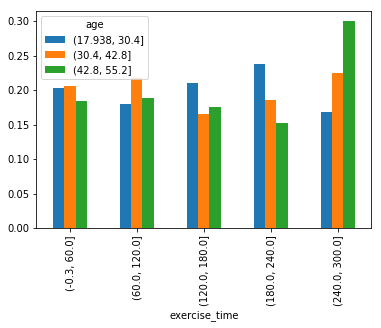

In [53]:
a_t_subset.plot(kind='bar'); #playing with different age groups

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


1. The variable types in the data are all integers.

numerical --> ordinal - set order, discrete - uses whole numbers like age
categorical -->

2. The relationships between the variables lead to a conclusion that both weight and age are related to exercise time, making exercise time the confounding variable and obfuscating the possible relationship between age and weight. One possible conclusion you can draw from a persons age as it relates to their weight is that it is evenly distributed.  

3.
Real: 
*   The amount of time spent exercising as a person ages starts to drop considerably after age 60.
*   The amount of time spent exercising as a person grows past a weight of around 150-160 lbs drops considerably as well.

Spurious:
*   The relationship between age and weight in this data set.



## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)

In [0]:
#reminder after looking at this data: correlation does not equal causation